In [6]:
import requests
import requests
from bs4 import BeautifulSoup
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://finance.yahoo.com/quote/AAPL/history?p=AAPL'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')


In [7]:
rows = soup.find_all('tr')

In [8]:
stock_data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 6:
        try:
            stock_data.append({
                "Date": cols[0].text,
                "Open": cols[1].text,
                "High": cols[2].text,
                "Low": cols[3].text,
                "Close": cols[4].text,
                "Volume": cols[6].text
            })
        except Exception as e:
            continue


In [9]:
with open("apple_stock_data.csv", "w", newline='') as file:
    writer = csv.DictWriter(file, fieldnames=stock_data[0].keys())
    writer.writeheader()
    writer.writerows(stock_data)

In [10]:
with open("apple_stock_data.json", "w") as file:
    json.dump(stock_data, file, indent=4)

In [11]:
df = pd.read_csv("apple_stock_data.csv")

In [14]:
# Ensure all values are treated as strings before using .str
df['Close'] = df['Close'].astype(str).str.replace(',', '').str.replace('-', '')

# Convert to numeric (non-numeric values will become NaN)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')



In [15]:
df = df.dropna()


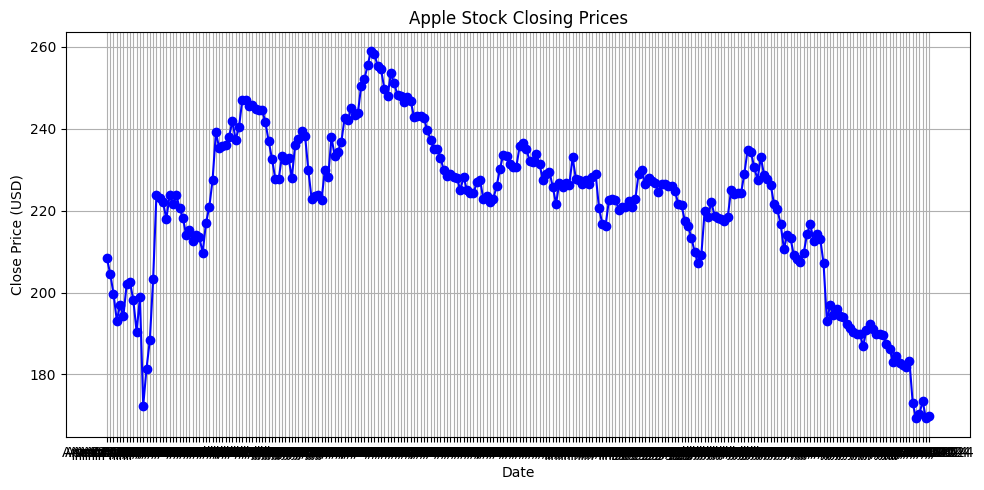

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='blue')
plt.title("Apple Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
